In [ ]:
# Import the library and package
import pandas as pd
import numpy as np
import requests
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Download and install the nltk data and packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
## Import or install PDF-to-text library
try:
    import PyPDF2
except:
    !pip install PyPDF2
    import PyPDF2

In [ ]:
# List of PDF files from local folder
file_names_USA = ['Population2030 (2).pdf', 'NDSTS-FINAL-WEB-VERSION.PDF', 'US-Gov-National-Standards-Strategy-2023.pdf']

In [ ]:
# Function to do data preprocessing including lemmatization
def data_preprocessing(text):
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    # Do the tokenization
    word_tokens = word_tokenize(text)
    # Do the lemmatization
    lemmatizer = WordNetLemmatizer()
    filteredlemmatized_text = [lemmatizer.lemmatize(word.lower()) for word in word_tokens if not word.lower() in stop_words]
    return ' '.join(filteredlemmatized_text)

In [ ]:
# Initialize a variable to hold the combined processed text from all PDFs
combined_processed_text = ""

# Loop through each PDF file, convert to text page-by-page, process text, and concatenate
for file_name in file_names_USA:
    pdf_file_path = file_name
    pdf_file = open(pdf_file_path, 'rb')
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    paper_text = ""
    for page_num in range(len(pdf_reader.pages)):
        page_text = pdf_reader.pages[page_num].extract_text().lower()
        filtered_page_text = page_text
        paper_text += filtered_page_text + "\n\n"
    combined_processed_text += paper_text + "\n\n--- End of " + file_name + " ---\n\n"

***ChatGPT API for Paper Summarization and Text Generation***

In [ ]:
# Import the package
try:
    import openai
except:
    !pip install openai
    import openai

In [ ]:
## API Key
API_KEY= "KEY"

os.environ['OPENAI_API_KEY'] = API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

In [ ]:
# Select the ChatGPT model
model = "gpt-4-0125-preview"

In [ ]:
from openai import OpenAI
client = OpenAI()

***Factor 1 - Human Capital - USA experience***

In [ ]:
prompt1 = 'Please conduct a sentiment analysis of the discussions around the human capital. Identify the overall sentiment (positive, negative, neutral) and highlight key phrases that contribute to this sentiment. Additionally, provide specific insights into how the human capital is perceived in terms of its impact on artificial intelligence (AI), renewable energy technologies, and quantum computing. Summarize the findings with specific examples and quotations from the document, if the provied transacript not have those factors, give it by yourself: "{input}".'.format(input=combined_processed_text)

In [ ]:
## Call OpenAI API for the first prompt
response1 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt1}
  ]
)

In [ ]:
coutput1 = response1.choices[0].message.content
print(coutput1)

Based on the provided excerpts from three significant U.S. government strategy documents for 2023, here's an analysis of the discussions around the human capital with respect to artificial intelligence (AI), renewable energy technologies, and quantum computing:

**Overall Sentiment:** Positive. The documents reflect an optimistic outlook regarding leveraging human capital to maintain and extend U.S. leadership in critical technology areas, including AI, renewable energy technologies, and quantum computing.

### Key Phrases Contributing to Sentiment:

- **"accelerated technology advancement and innovation"**
- **"unparalleled creativity, innovation, and adaptation"**
- **"strengthening the u.s. approach to standards development"**
- **"commitment to free and fair market competition"**
- **"bolstering U.S. engagement in standards for critical and emerging technology (CET) spaces"**
- **"ensure that cet are developed and deployed in ways that benefit not only the United States but all who

***Factor 1 - Human Capital - UK experience***

In [ ]:
file_names_UK = ['UK Build Back Better.pdf', 'evidence-for-innovation-strategy.pdf', 'uk-innovation-strategy.pdf', 'uk-international-technology-strategy-web-version.pdf', 'uk-science-technology-framework.pdf']

In [ ]:
# Initialize a variable to hold the combined processed text from all PDFs
combined_processed_text_UK = ""

# Loop through each PDF file, convert to text page-by-page, process text, and concatenate
for file_name in file_names_UK:
    pdf_file_path = file_name
    pdf_file = open(pdf_file_path, 'rb')
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    paper_text = ""
    for page_num in range(len(pdf_reader.pages)):
        page_text = pdf_reader.pages[page_num].extract_text().lower()
        filtered_page_text = page_text
        paper_text += filtered_page_text + "\n\n"
    combined_processed_text_UK += paper_text + "\n\n--- End of " + file_name + " ---\n\n"

In [ ]:
prompt2 = 'Please conduct a sentiment analysis of the discussions around the human capital. Identify the overall sentiment (positive, negative, neutral) and highlight key phrases that contribute to this sentiment. Additionally, provide specific insights into how the human capital is perceived in terms of its impact on artificial intelligence (AI), renewable energy technologies, and quantum computing. Summarize the findings with specific examples and quotations from the document, if the provied transacript not have those factors, give it by yourself: "{input2}".'.format(input2=combined_processed_text_UK)

In [ ]:
def reduce_content(content, max_length=128000):
    # Simple approach: Cut off the content to fit within the max_length
    # This is a naive approach and might not perfectly align with token limits
    return content[:max_length]

# Assuming 'content' is your text that resulted in 160022 tokens
# Adjust the `max_length` as needed based on your understanding of the average token size
reduced_content = reduce_content(prompt2, max_length=128000)  # You might adjust the max_length


In [ ]:
## Call OpenAI API for the first prompt
response2 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": reduced_content}
  ]
)

In [ ]:
coutput2 = response2.choices[0].message.content
print(coutput2)

Given the vast content presented in the document, a detailed sentiment analysis around the discussions of human capital reveals an overall positive sentiment. The document highlights ambitious plans for growth, significantly focused on innovation, infrastructure, skills development, and achieving net zero emissions, all of which are seen positively as they promise economic revitalization and sustainability.

### Key Phrases Contributing to Positive Sentiment:
- "historic opportunity before us"
- "grasp the historic opportunity"
- "investing massively in science and technology"
- "historic underinvestment in infrastructure… we are fixing that"
- "collaboration between industry, science and government"
- "levelling up across our United Kingdom"
- "unleash the potential of our whole country"
- "science and technology superpower"
- "green industrial revolution"
- "high-quality infrastructure is crucial for economic growth"
- "lifetime skills guarantee"
- "world-leading research base"
- "un

***CANADA policy***

In [ ]:
prompt3 = 'According to the concept of coutput1 and coutput2, please develop a practical human capital program and policy for Canada based on the experience of the USA and UK in human capital (please refer to the policy on Public Relations): "{}{}".'.format(coutput1, coutput2)

In [ ]:
## Call OpenAI API for the first prompt
response3 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt3}
  ]
)

In [ ]:
coutput3 = response3.choices[0].message.content
print(coutput3)

Creating a practical human capital program for Canada, leveraging insights from the USA and UK regarding artificial intelligence (AI), renewable energy technologies, and quantum computing, requires a nuanced understanding of both the potential of these technologies and the role of human capital in catalyzing their development and deployment. Considering the focus on public relations (PR) as a pivotal part of implementing these policies, a multi-faceted approach can ensure effective communication, public engagement, and workforce readiness in these sectors. 

### 1. **Human Capital Development Strategy**:

#### Aim:
Develop a high-skilled workforce that is capable of leading and supporting advancements in AI, renewable energy technologies, and quantum computing within Canada.

#### Key Components:

- **Education and Training:** Launch specialized training programs at universities, colleges, and vocational schools focusing on AI, renewable energy, and quantum computing. This includes par

***DATA Visualization***

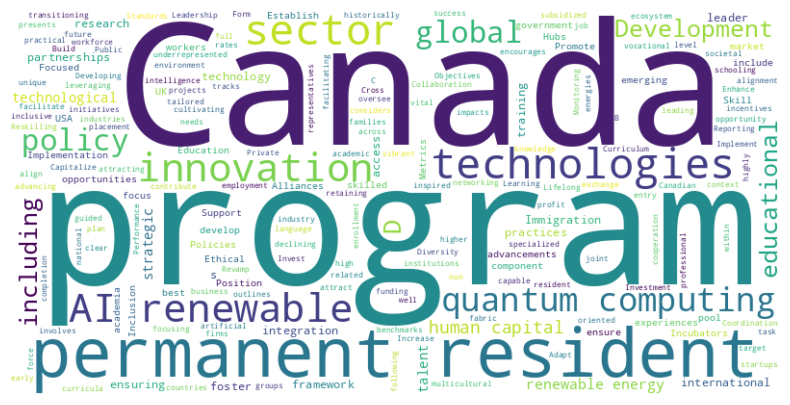

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Defining the text
text = """
Developing a practical human capital program and policy for Canada, inspired by the experiences of the USA and UK in leveraging human capital for technological innovation, presents a unique opportunity to align national policy with future-oriented technologies such as artificial intelligence (AI), renewable energy technologies, and quantum computing. The following outlines a strategic framework tailored to Canada’s context, with a focus on permanent residents as a vital component of the talent pool.

**1. Strategic Objectives:**

- **Foster Innovation and Technological Leadership:** Position Canada as a global leader in AI, renewable energy technologies, and quantum computing by cultivating an environment that encourages innovation and research.
- **Enhance Human Capital Development:** Invest in educational and vocational training programs to develop a highly skilled workforce capable of advancing emerging technologies.
- **Promote Inclusion and Diversity:** Capitalize on Canada's multicultural fabric by ensuring inclusive access to opportunities for all residents, including permanent residents, to contribute to technological advancements.

**2. Policy and Program Components:**

**A. Education and Skills Development:**

- **Technology-Focused Educational Curriculum:** Revamp educational curricula from early schooling through higher education to include specialized tracks for AI, renewable energy, and quantum computing. This involves partnerships with academic institutions and industries to ensure alignment with market needs.
- **Lifelong Learning and Reskilling Programs:** Implement government-subsidized training programs for workers transitioning from declining sectors to emerging technology sectors, focusing on permanent residents and historically underrepresented groups.

**B. Research and Development (R&D) Support:**

- **Public and Private R&D Investment:** Increase funding for R&D in AI, renewable energies, and quantum computing, with incentives for projects that include partnerships between Canadian firms and international leaders, as well as academia.
- **Innovation Hubs and Incubators:** Establish and support innovation hubs and business incubators across Canada, with a focus on attracting and retaining talents, including permanent residents, to foster a vibrant ecosystem of technology startups.

**C. Immigration and Integration Policies:**

- **Skill-Focused Immigration:** Adapt Canada’s immigration policy to attract global talent in AI, renewable energy, and quantum computing, facilitating the entry and integration of skilled workers and their families.
- **Permanent Resident Inclusion:** Develop programs to ensure that permanent residents have full access to educational and employment opportunities in these sectors, including language training and professional networking.

**D. Strategic International Collaboration:**

- **Global Partnerships and Alliances:** Build strategic alliances with leading countries in these technologies to facilitate knowledge exchange, joint research initiatives, and access to global markets.
- **Ethical Standards and Practices:** Promote the development of these technologies within an ethical framework that considers societal impacts, guided by international best practices and cooperation.

**3. Implementation and Monitoring:**

- **Cross-Sector Coordination:** Form a high-level task force with representatives from government, industry, academia, and non-profit sectors to oversee the implementation of the human capital development plan.
- **Performance Metrics and Reporting:** Establish clear metrics for success, including benchmarks related to educational program enrollment and completion, job placement rates in target sectors, R&D outputs, and the integration of permanent residents into these sectors.
- **Adaptive Policy Framework:** Regularly review and adjust policies and programs in response to technological advancements, global trends, and feedback from stakeholders, ensuring the agility and relevancy of Canada’s human capital strategy.

By adopting and adapting the best practices from the USA and UK experiences, this comprehensive approach aims to leverage Canada's diverse talent pool, including permanent residents, to foster innovation and secure its position as a leader in AI, renewable energy technologies, and quantum computing, thus ensuring long-term economic growth and security.
"""

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Displaying the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.show()